# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))

579


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
citiesdf=pd.DataFrame(cities)
citiesdf.rename(columns={0:"City"}, inplace=True)
citiesdf["Lat"]=""
citiesdf["Temperature (F)"]=None
citiesdf["Humidity (%)"]=None
citiesdf["Cloudiness (%)"]=None
citiesdf["Wind Speed (mph)"]=None
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

for index, row in citiesdf.iterrows():
    try:
        response=requests.get(url+row["City"]).json()
        row["Lat"]=response["coord"]["lat"]
        row["Temperature (F)"]=response["main"]["temp"]
        row["Humidity (%)"]=response["main"]["humidity"]
        row["Cloudiness (%)"]=response["clouds"]["all"]
        row["Wind Speed (mph)"]=response["wind"]["speed"]
        print(f"Processing the data for City #{index}: {row['City']}")
    except(KeyError):
        print(f"Error with City #{index}: {row['City']}")
    

Processing the data for City #0: vardo
Processing the data for City #1: constantine
Processing the data for City #2: hermanus
Processing the data for City #3: buraydah
Error with City #4: umm durman
Processing the data for City #5: jamestown
Processing the data for City #6: ribeira grande
Processing the data for City #7: provideniya
Processing the data for City #8: bengkulu
Error with City #9: illoqqortoormiut
Processing the data for City #10: ushuaia
Processing the data for City #11: vilhena
Processing the data for City #12: yar-sale
Processing the data for City #13: tiznit
Processing the data for City #14: sola
Processing the data for City #15: valleyview
Processing the data for City #16: nikolskoye
Error with City #17: mys shmidta
Processing the data for City #18: georgetown
Processing the data for City #19: mar del plata
Processing the data for City #20: beaverlodge
Processing the data for City #21: worland
Processing the data for City #22: barrow
Processing the data for City #23: 

Processing the data for City #194: hasaki
Processing the data for City #195: mehran
Processing the data for City #196: tornio
Processing the data for City #197: beringovskiy
Processing the data for City #198: castro
Processing the data for City #199: carutapera
Error with City #200: kalomo
Processing the data for City #201: soto la marina
Processing the data for City #202: oktyabrskiy
Processing the data for City #203: kloulklubed
Processing the data for City #204: sisimiut
Processing the data for City #205: mayumba
Processing the data for City #206: sitka
Processing the data for City #207: pisco
Processing the data for City #208: katsuura
Processing the data for City #209: khonsa
Processing the data for City #210: porto novo
Processing the data for City #211: lavrentiya
Processing the data for City #212: sao jose da coroa grande
Processing the data for City #213: gerash
Processing the data for City #214: airai
Processing the data for City #215: canico
Error with City #216: felidhoo
Pr

Processing the data for City #384: cayenne
Processing the data for City #385: mehamn
Processing the data for City #386: emba
Error with City #387: attawapiskat
Error with City #388: sumbawa
Processing the data for City #389: moose factory
Processing the data for City #390: kostomuksha
Error with City #391: stamsund
Processing the data for City #392: osmanabad
Processing the data for City #393: biak
Processing the data for City #394: dibulla
Processing the data for City #395: aksarka
Processing the data for City #396: dunedin
Processing the data for City #397: salym
Processing the data for City #398: faya
Error with City #399: fevralsk
Processing the data for City #400: kampot
Processing the data for City #401: arani
Processing the data for City #402: adrar
Processing the data for City #403: ulaangom
Processing the data for City #404: aras
Error with City #405: saint combs
Processing the data for City #406: pahrump
Processing the data for City #407: turukhansk
Processing the data for Ci

Processing the data for City #577: baykit
Processing the data for City #578: totskoye


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
citiesdfdropped=citiesdf.dropna()

In [86]:
citiesdfdropped["Lat"]=citiesdfdropped["Lat"].astype("float")
citiesdfdropped["Temperature (F)"]=citiesdfdropped["Temperature (F)"].astype("float")
citiesdfdropped["Humidity (%)"]=citiesdfdropped["Humidity (%)"].astype("float")
citiesdfdropped["Cloudiness (%)"]=citiesdfdropped["Cloudiness (%)"].astype("float")
citiesdfdropped["Wind Speed (mph)"]=citiesdfdropped["Wind Speed (mph)"].astype("float")
citiesdfdropped.to_csv(output_data_file)

C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

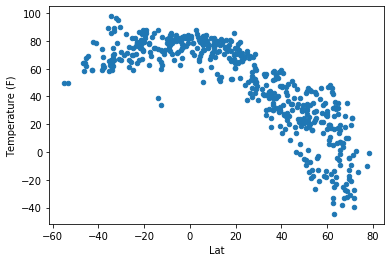

In [117]:
citiesdfdropped.plot.scatter("Lat","Temperature (F)")
plt.savefig('../output_data/LatvsTemp.png')

#### Latitude vs. Humidity Plot

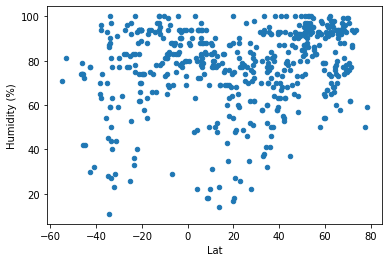

In [118]:
citiesdfdropped.plot.scatter("Lat","Humidity (%)")
plt.savefig('../output_data/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

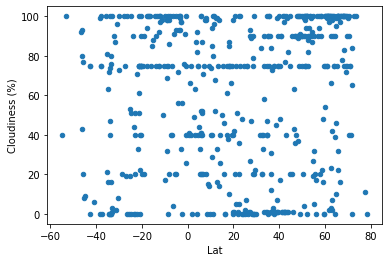

In [119]:
citiesdfdropped.plot.scatter("Lat","Cloudiness (%)")
plt.savefig('../output_data/LatvsClouds.png')

#### Latitude vs. Wind Speed Plot

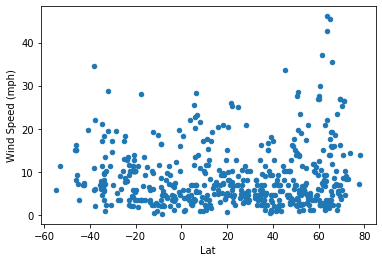

In [120]:
citiesdfdropped.plot.scatter("Lat","Wind Speed (mph)")
plt.savefig('../output_data/LatvsWind.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [88]:
# Create Northern and Southern Hemisphere DataFrames
northerndf=citiesdfdropped.loc[citiesdfdropped["Lat"]>=0]
southerndf=citiesdfdropped.loc[citiesdfdropped["Lat"]<0]
northerndf

,City,Lat,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vardo,70.37,19.40,79.0,40.0,25.28
1,constantine,36.37,51.80,50.0,31.0,11.41
3,buraydah,26.33,42.80,70.0,0.0,6.89
5,jamestown,42.10,25.92,53.0,1.0,9.17
6,ribeira grande,38.52,53.55,70.0,45.0,9.24
...,...,...,...,...,...,...
574,miri,4.41,79.50,94.0,75.0,2.24
575,gibara,21.11,64.40,68.0,75.0,6.93
576,sabang,5.89,82.49,78.0,41.0,20.18
577,baykit,61.67,-16.01,99.0,97.0,2.66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

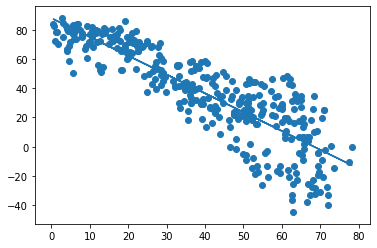

In [105]:
# northerndf.sort_values(["Temperature (F)"], ascending=False, inplace=True)
# northerndf
# northerngroupeddf=northerndf.groupby(["Lat"]).first()

# slope, intercept, r_value, p_value, sem = linregress(northerngroupeddf.index.values,northerngroupeddf["Temperature (F)"])
# plt.plot(northerngroupeddf.index.values, slope*northerngroupeddf.index.values+intercept)
# plt.scatter(northerngroupeddf.index.values,northerngroupeddf["Temperature (F)"])

slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Temperature (F)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Temperature (F)"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

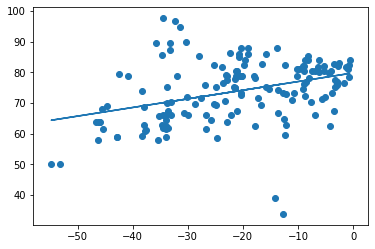

In [106]:
# southerndf.sort_values(["Temperature (F)"], ascending=False, inplace=True)
# southerndf
# southerngroupeddf=southerndf.groupby(["Lat"]).first()

# slope, intercept, r_value, p_value, sem = linregress(southerngroupeddf.index.values,southerngroupeddf["Temperature (F)"])
# plt.plot(southerngroupeddf.index.values, slope*southerngroupeddf.index.values+intercept)
# plt.scatter(southerngroupeddf.index.values,southerngroupeddf["Temperature (F)"])
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Temperature (F)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Temperature (F)"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

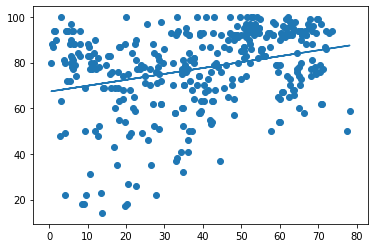

In [107]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Humidity (%)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Humidity (%)"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

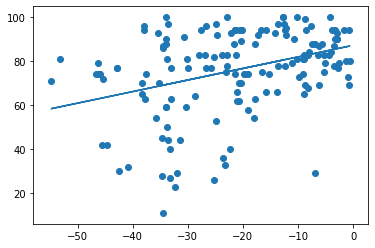

In [108]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Humidity (%)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Humidity (%)"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

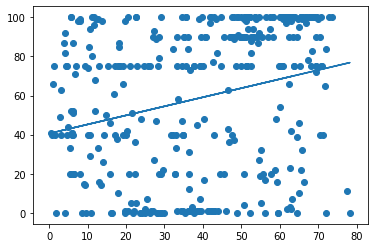

In [109]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Cloudiness (%)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Cloudiness (%)"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

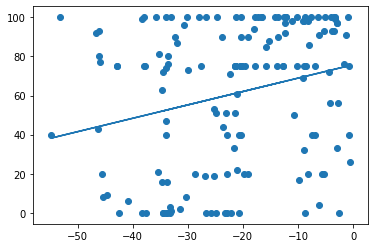

In [110]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Cloudiness (%)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Cloudiness (%)"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

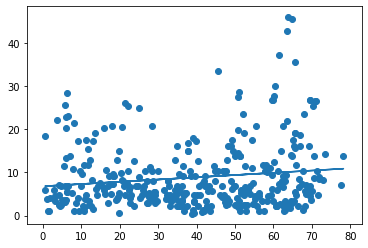

In [111]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Wind Speed (mph)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Wind Speed (mph)"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

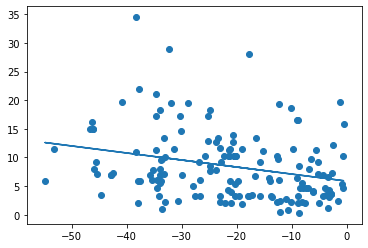

In [112]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Wind Speed (mph)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Wind Speed (mph)"])